## Linear Regression

We will study relationship between sales and market spend on TV, Radio and News Paper advertisements.

In [1]:
# Load data with Pandas
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

Reading material:
* Pandas - https://pandas.pydata.org/, https://www.learnpython.org/en/Pandas_Basics 
* Numpy - http://www.numpy.org/ 
* Scikit - http://scikit-learn.org/
* matplotlib - https://matplotlib.org/

In [2]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# Visualize our data
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Get to know data

What are the features?
* TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
* Radio: advertising dollars spent on Radio
* Newspaper: advertising dollars spent on Newspaper

What is the response?
* Sales: sales of a single product in a given market (in thousands of widgets)

In [3]:
# Size of sample
data.shape

(200, 4)

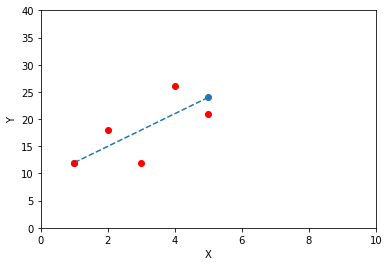

In [4]:
import matplotlib.pyplot as plt

# Try changing plot numbers and see how does it change the graph

plt.plot([1, 5], [12,24], "o--")
plt.plot([1,2, 3, 4, 5], [12,18,12,26, 21], "ro")
plt.ylabel('Y')
plt.xlabel('X')
plt.axis([0, 10, 0, 40])
plt.show()


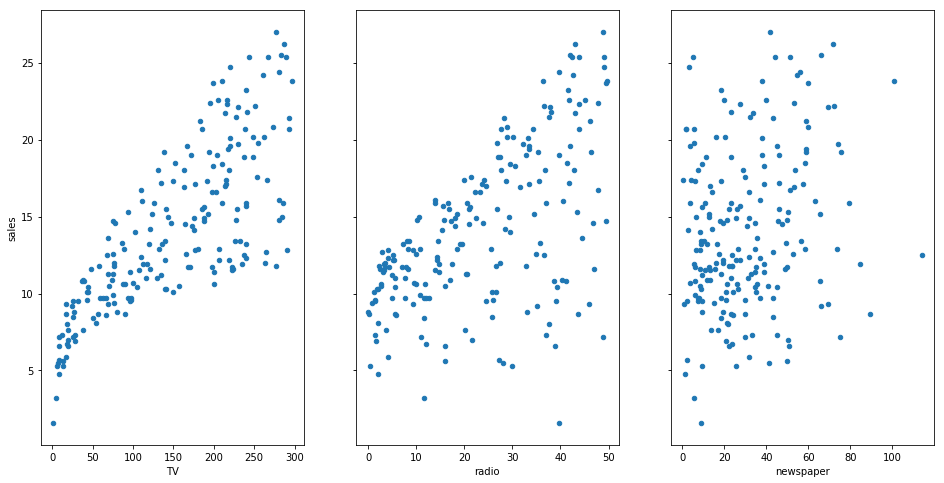

In [5]:
ig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

#### Questions about data
* Is there any relationship between ads and sales?
* How strong is that relationship?
* Which ad type(s) contribute to sales?
* What is the effect of each ad type of sales?
* Given ad spending in a particular market, can sales be predicted?

### Estimate model coefficients 

In [6]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='sales ~ TV', data=data).fit()

## Try it out
## If we have to use two features. 
## See change in params
#lm = smf.ols(formula='sales ~ (TV + radio)', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

### Understanding coefficient

A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.

If an increase in TV ad spending was associated with a decrease in sales, b would be negative.

Predicting value

Y = a + bx

Y = 7.032594 + 0.047537×50

In [7]:
7.032594 + 0.047537*50

9.409444

### Predicting using statsmodel

#### Add new dataframe


In [8]:
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


#### Predicting values using model 


In [9]:
lm.predict(X_new)

0    9.409426
dtype: float64

### Plotting least square line
#### Create Dataframe
Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:


In [10]:
# Try model with only radio and see how does this will change the below graph

X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [11]:
# Make predictions

preds = lm.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

In [12]:
lm.rsquared

0.61187505085007099

Plotting least square line


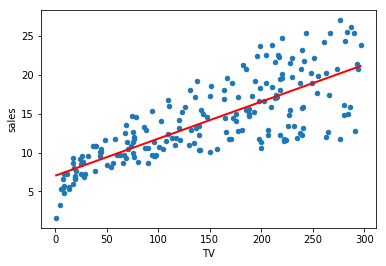

In [13]:
data.plot(kind="scatter", x="TV", y="sales")
plt.plot(X_new, preds, c="red", linewidth=2)

In [14]:
#lm.summary()


## Using Scikit-learn

In [15]:
# Try with just radio, newspaper, or combination of any two.

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# print intercept and coefficients
print(lm1.intercept_)
print(lm1.coef_)

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [17]:
lm1.predict([[100, 25, 25]])

array([ 12.20266701])

In [18]:
lm1.score(X, y)

0.89721063817895208

Reading material
* http://www.onmyphd.com/?p=gradient.descent